# Logistic Regression

A pesar de su nombre, la regresión logística es usada en problemas de clasificación, no en problemas de regresión.

$$
\frac{1}{1 + e^{-(b +\Sigma_{i=1} \beta_i x_i)}}
$$

la función de perdida no puede ser la misma que en una regresión linean ya que este no es un [problema convexo](https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11#:~:text=Cost%20Function,its%20vertex%20as%20global%20minimum.&text=The%20loss%20function%20of%20logistic,which%20is%20called%20Logistic%20Loss%20.)

para calcular la perdida incurrida cada que ajustamos una regresión, lo común es usar la función logloss

$-[y_i ln(p_i) + (1-y_i) ln(1 - p_i)]$

Dada un conjunto de features, la regresión logística regresará una probabilidad __p__ con relación a la variable target. 

* Si p es mayor a 0.5, etiquetamos los datos como 1
* Si p es menor a 0.5, etiquetamos los datos como 0

Para trabajar una regresión logística en __scikit-learn__, se sigue exactamente los mismos pasos que hemos trabajado con otros algoritmos previamente: 

1. Importamos los módulos necesarios

```python
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
```

2. Instanciar el clasificador

```python
logreg = LogisticRegression()
```

3. Partir los datos en conjuntos de entrenamiento y prueba

```python
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state=42)
```

4. Ajustar el modelo sobre los datos de entrenamiento

```python
logreg.fit(X_train, y_train)
```

5. Hacer pronosticos sobre los datos de prueba

```python
y_pred = logreg.predict(X_test)
```

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)

## Ejemplo 01

A partir de diferentes caracteristicas de las personas, deseamos saber si será un posible donador para programas economicos

In [2]:
basetable = pd.read_csv('https://raw.githubusercontent.com/edroga/Datasets_for_projects/main/basetable.csv')

In [3]:
basetable.head(3)

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift
0,0,1,0,1,0,1,0,65,530,2265,166.0,87.0,116.0,7
1,0,1,0,0,0,1,0,71,715,715,90.0,90.0,90.0,1
2,0,1,0,0,0,1,0,28,150,1806,125.0,74.0,96.0,9


In [4]:
basetable.shape

(25000, 14)

Tiramos algunas variables que no usaremos y separamos la variable target

In [5]:
# X = basetable.drop('target', axis=1).values
X = basetable[['age', 'gender_F', 'time_since_last_gift']].values
y = basetable['target'].values

balance ratio = (instancias positivas) / (instancias negativas)

In [6]:
 basetable['target'].value_counts()

0    23813
1     1187
Name: target, dtype: int64

In [7]:
print('Porcentaje de instancias con clase negativa',23813/(23813 + 1187))
print('Porcentaje de instancias con clase positva',1187/(23813 + 1187))

Porcentaje de instancias con clase negativa 0.95252
Porcentaje de instancias con clase positva 0.04748


In [ ]:
print('balance ratio: ', round(y.sum()/(len(y) - y.sum()), 4))

balance ratio:  0.0498


In [ ]:
print('Tienes una relación de 100:4')

Tienes una relación de 100:4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.5,
                                                    random_state=42,
                                                    stratify = y)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
# classification report
print(classification_report(y_test, y_pred, zero_division = False))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     11907
           1       0.00      0.00      0.00       593

    accuracy                           0.95     12500
   macro avg       0.48      0.50      0.49     12500
weighted avg       0.91      0.95      0.93     12500



In [ ]:
# classification report
print(confusion_matrix(y_test, y_pred))

[[11907     0]
 [  593     0]]


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=.9,
                                 random_state=42)

X_res, y_res = undersample.fit_resample(X_train, y_train)

In [ ]:
y_res.sum()

594

In [ ]:
len(y_res) - y_res.sum()

660

In [ ]:
print('balance ratio: ', round(y_res.sum()/(len(y_res) - y_res.sum()), 4))

balance ratio:  0.9


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_res, y_res)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
# matriz de confusion
print(confusion_matrix(y_test, y_pred))

[[8036 3871]
 [ 292  301]]


In [ ]:
print(y_test.sum())
print(len(y_test))

593
12500


In [ ]:
# 100:4
593/12500

0.04744

In [ ]:
# classification report
print(classification_report(y_test, y_pred, zero_division = False))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79     11907
           1       0.07      0.51      0.13       593

    accuracy                           0.67     12500
   macro avg       0.52      0.59      0.46     12500
weighted avg       0.92      0.67      0.76     12500



In [ ]:
# list(logreg.predict(X_test))

## __threshold__

por defecto usamos un __threshold__ (punto de corte) de 0.5, este threshold define el output del modelo, si queremos ver las probabilidades, entonces usamos el método `.predict_proba()`

Tomando como base el ejercicio anterior, de la siguiente forma podemo obtener las probabilidades de pertenecia a una clase:

In [ ]:
# obtenemos las probabilidas
y_probas = logreg.predict_proba(X_test)
# El output de logreg.predict_proba(X_test) es un arreglo de numpy con dimensiones (Instancias_en_test, Cantidad_de_clases)

La primera columna representa la probabilidad de pertenecer a la clase 0 y la segunda columna representa la probabilidad de pertenecer a la clase 1 (el complemento)

In [ ]:
y_probas[:5,:]

array([[0.37827584, 0.62172416],
       [0.48091475, 0.51908525],
       [0.46831696, 0.53168304],
       [0.57432266, 0.42567734],
       [0.47178602, 0.52821398]])

In [ ]:
# transformemos el output en un DataFrame
probabilidades_df = pd.DataFrame(logreg.predict_proba(X_test), columns = ['probabilidad_de_C0', 'probabilidad_de_C1'])
probabilidades_df.head()

,probabilidad_de_C0,probabilidad_de_C1
0,0.378276,0.621724
1,0.480915,0.519085
2,0.468317,0.531683
3,0.574323,0.425677
4,0.471786,0.528214


In [ ]:
# Agregamos los resultados de logreg.predict(X_test)
probabilidades_df['clasificacion'] = logreg.predict(X_test)

In [ ]:
probabilidades_df.head(20)

,probabilidad_de_C0,probabilidad_de_C1,clasificacion
0,0.378276,0.621724,1
1,0.480915,0.519085,1
2,0.468317,0.531683,1
3,0.574323,0.425677,0
4,0.471786,0.528214,1
5,0.595901,0.404099,0
6,0.552073,0.447927,0
7,0.459216,0.540784,1
8,0.406499,0.593501,1
9,0.642538,0.357462,0


## Ejemplo 02

El objetivo en este problema es detectar a partir de algunas características, si una persona está enferma del corazón, la variable target es `num` la cual indica si una persona tiene o no enfermedades en el corazón.

als demas variables son:

* `age`: age in years
* `sex`: sex (1 = male; 0 = female)
* `cp`: chest pain type
    * 1: typical angina
    * 2: atypical angina
    * 3: non-anginal pain
    * 4: asymptomatic
* `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
* `chol`: serum cholesterol in mg/dl
* `fbs`: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* `restecg`: resting electrocardiographic results
    * 0: normal
    * 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (1 = yes; 0 = no)
* `oldpeak`: ST depression induced by exercise relative to rest

In [ ]:
HearAttack = (pd.read_csv('https://raw.githubusercontent.com/edroga/Datasets_for_projects/main/Heart_Attack.csv',
                          na_values='?')
              .drop(columns = ['slope', 'ca', 'thal'])
              .rename(columns={'num       ': 'target'})
              .dropna()
              )

HearAttack = pd.get_dummies(HearAttack, columns = ['cp', 'restecg'], drop_first = True)

HearAttack.head(6)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_2,cp_3,cp_4,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,1,0,0,0,1
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,1,0,0,0,0
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,0,0,0,1,0
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,1,0,0,1,0
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,1,0,0,0,0
6,32,1,110.0,225.0,0.0,184.0,0.0,0.0,0,1,0,0,0,0


In [ ]:
#HearAttack = pd.get_dummies(HearAttack, columns = ['cp', 'restecg'])
#HearAttack.head(6)

In [ ]:
HearAttack.dtypes

age              int64
sex              int64
trestbps       float64
chol           float64
fbs            float64
thalach        float64
exang          float64
oldpeak        float64
target           int64
cp_2             uint8
cp_3             uint8
cp_4             uint8
restecg_1.0      uint8
restecg_2.0      uint8
dtype: object

In [ ]:
# 1 importamos los modulos necesarios
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# 2 partimos los datos
X = HearAttack.drop(columns=['target']).values
y = HearAttack['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.5,
                                                    random_state=42,
                                                    stratify = y)

In [ ]:
# 3 Instanciamos el clasificador
logreg = LogisticRegression(max_iter=600)

In [ ]:
# 4 ajustamos el modelo sobre los datos de entrenamiento
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=600)

In [ ]:
# 5 Hacer pronosticos sobre los datos de prueba
y_pred = logreg.predict(X_test)

In [ ]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[78  4]
 [14 35]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        82
           1       0.90      0.71      0.80        49

    accuracy                           0.86       131
   macro avg       0.87      0.83      0.85       131
weighted avg       0.87      0.86      0.86       131



In [ ]:
# Construimos un DataFrame para comparar que esta ocurriendo con las probabilidades

In [ ]:
probabilidades_df = pd.DataFrame(logreg.predict_proba(X_test), columns = ['probabilidad_de_C0', 'probabilidad_de_C1'])
probabilidades_df.head()

,probabilidad_de_C0,probabilidad_de_C1
0,0.881828,0.118172
1,0.025194,0.974806
2,0.876246,0.123754
3,0.928657,0.071343
4,0.080429,0.919571


In [ ]:
outputs_df = (pd.DataFrame(logreg.predict_proba(X_test))
                .drop(columns = [0])
                .rename(columns = {1:'probabilidad_de_clase_01'})
                .assign(Valores_reales = lambda x: y_test)
                # .loc[:,['Valores_reales', ]]
                .assign(output_with_default_threshold = lambda x: logreg.predict(X_test))
                # # Creamos otros thresholds
                .assign(dot_001_threshold = lambda x: np.where(x['probabilidad_de_clase_01'] >= 0.001, 1, 0))
                .assign(dot_3_threshold   = lambda x: np.where(x['probabilidad_de_clase_01'] >= 0.3, 1, 0))
                .assign(dot_92_threshold  = lambda x: np.where(x['probabilidad_de_clase_01'] >= 0.92, 1, 0))
                .assign(dot_96_threshold = lambda x: np.where(x['probabilidad_de_clase_01'] >= 0.96, 1, 0))
             )

outputs_df.head(20)

,probabilidad_de_clase_01,Valores_reales,output_with_default_threshold,dot_001_threshold,dot_3_threshold,dot_92_threshold,dot_96_threshold
0,0.118172,1,0,1,0,0,0
1,0.974806,1,1,1,1,1,1
2,0.123754,0,0,1,0,0,0
3,0.071343,1,0,1,0,0,0
4,0.919571,1,1,1,1,0,0
5,0.820702,1,1,1,1,0,0
6,0.120596,0,0,1,0,0,0
7,0.038146,0,0,1,0,0,0
8,0.451994,1,0,1,1,0,0
9,0.081541,0,0,1,0,0,0


Que pasa con las __matrices de confusión__ si variamos el __threshold__?

In [ ]:
# confusion matrix con threshold = 0.3
print('Matrix para un threshold de 0.5')
print(confusion_matrix(outputs_df['Valores_reales'], outputs_df['output_with_default_threshold']))

print('-'*60)
print('Matrix para un threshold de 0.001')
print(confusion_matrix(outputs_df['Valores_reales'], outputs_df['dot_001_threshold']))

print('-'*60)
print('Matrix para un threshold de 0.3')
print(confusion_matrix(outputs_df['Valores_reales'], outputs_df['dot_3_threshold']))

print('-'*60)
print('Matrix para un threshold de 0.92')
print(confusion_matrix(outputs_df['Valores_reales'], outputs_df['dot_92_threshold']))

print('-'*60)
print('Matrix para un threshold de 0.96')
print(confusion_matrix(outputs_df['Valores_reales'], outputs_df['dot_96_threshold']))

Matrix para un threshold de 0.5
[[78  4]
 [14 35]]
------------------------------------------------------------
Matrix para un threshold de 0.001
[[ 0 82]
 [ 0 49]]
------------------------------------------------------------
Matrix para un threshold de 0.3
[[69 13]
 [10 39]]
------------------------------------------------------------
Matrix para un threshold de 0.92
[[82  0]
 [39 10]]
------------------------------------------------------------
Matrix para un threshold de 0.96
[[82  0]
 [42  7]]


__Y si queremos analizar todos los thresholds?__

## ROC

Cuando el __threshold__ es igual a cero, el modelo predice que todos los datos tienen categoría positiva (Sí __p__ es mayor o igual a cero entonces la etiqueta es 1), esto implica que tanto la tasa de verdaderos positivos como la tasa de falsos positivos sean iguales a 1.

En el otro extremo, cuando el __threshold__ es igual a 1, el modelo predice que todos los datos tienen categoría negativa (Sí __p__ es mayor o igual a uno entonces la etiqueta es 1), esto implica que tanto la tasa de verdaderos positivos como la tasa de falsos positivos sean iguales a 0.

Si variamos el __threshold__ entre estos dos extremos, obtendremos una serie de diferentes valores para la tasa de verdaderos positivos y falsos positivos.

ROC (Reciber operator characteristic) son curvas para resumir visualmente toda la información si consideramos todas las variaciones del __threshold__, dicho de otra forma es el conjunto de resultados que obtenemos al variar sobre cada posible __threshold__.

la forma de crear está gráfica es la siguiente:

* En el eje de las Ys mapeamos el __True Positive Rate (Sensitivity)__ = TP/(TP + FN), recuerda que el True positive rate nos indica la proporcion de observaciones con clase positiva que fueron correctamente clasificadas

* En el eje de las Xs mapeamos el __False Positive Rate (1 - specificity)__ = FP/(FP + TN), recuerda que el False positive rate nos indica la proporcion de clases negativas que fueron incorrectamente clasificadas



Para gráficar la curva ROC importamos __`roc_curve`__ del módulo __metrics__ de __scikit learn__



```python
from sklearn.metrics import roc_curve
```



Tomamos la segunda columna (las probabilidades) del resultado arrojado por el método `.predict_proba()` (aplicado al modelo) usando `X_test` como argumento.

Cada una de las columnas que arroja `.predict_proba()` contiene la probabilidad para cada una de las etiquetas de la variable target, seleccionamos la segunda columna (con índice 1), es decir, las probabilidades cuando la etiqueta es pronosticada como 1.



```python
y_pred_prob = logreg.predict_proba(X_test)[:,1]
```



Ahora llamamos a la función `roc_curve()` usando como primer argumento las etiquetas reales del conjunto de prueba `y_test`, como segundo argumento `y_pred_prob` (las probabilidades) y desempacamos los resultados en tres variables:

* `fpr` el False Positive Rate
* `tpr` el True Positive Rate
* `thresholds` los puntos de corte



```python
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
```



Ejemplo:

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

podmeos usar fpr y tpr para gráficar la curva de la siguiente forma:

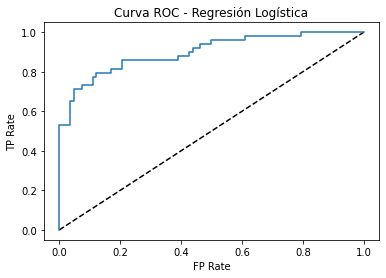

In [ ]:
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr, label='Regresión Logística')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.title('Curva ROC - Regresión Logística')
plt.show()

## AUC

Esta metrica representa el area bajo la curva ROC, entre mas grande mejor y se interpreta como que el modelo tiene una muy buena capacidad para separar entre clases

In [ ]:
from sklearn.metrics import roc_auc_score
logreg = LogisticRegression(max_iter=2000)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4, 
                                                    random_state=42,
                                                    stratify = y)
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

0.9083139083139083

## Regularización

En scikit learn podemos penalizar las regresiones logisticas agregando regularización L1 o L2, de hecho por defecto L2 es usado.

en scikit learn especificamos los siguientes paramentros

* `penalty` que puede ser `l1`, `l2`, `elasticnet`, `none`
* `C` que es la fuerza inversa de regularización análogo a alpha




__NOTA__ posiblemente necesites usar diferentes paramentros para `solver`

Ejemplo

In [ ]:
logreg = LogisticRegression(C=0.01, penalty="l1", solver = "saga")
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4, 
                                                    random_state=42,
                                                    stratify = y)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        66
           1       0.66      0.49      0.56        39

    accuracy                           0.71       105
   macro avg       0.70      0.67      0.67       105
weighted avg       0.71      0.71      0.70       105



Ejemplo 

Regresion logistiva vs modelos penalizados

In [ ]:
# Compara el mejor modelo visualmente usando ROC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4, 
                                                    random_state=42,
                                                    stratify = y)

In [ ]:
lr = LogisticRegression(max_iter=2000).fit(X_train, y_train)
lr_l1_01 = LogisticRegression(C=0.01, penalty="l1", solver = "saga").fit(X_train, y_train)

In [ ]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


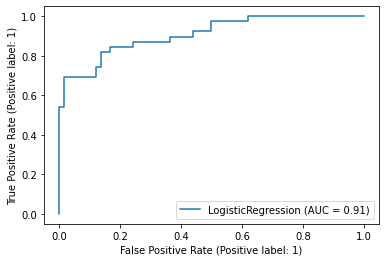

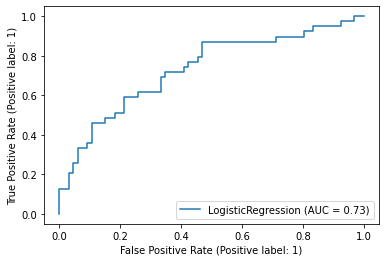

In [ ]:
lr_curva = plot_roc_curve(lr, X_test, y_test)
lr_l1_curva = plot_roc_curve(lr_l1_01, X_test, y_test)

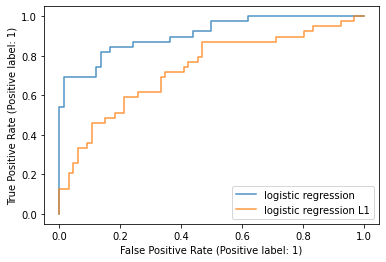

In [ ]:
ax = plt.gca()
lr_curva.plot(ax = ax, alpha = 0.8, label='logistic regression')
lr_l1_curva.plot(ax = ax, alpha = 0.8, label='logistic regression L1')

## Ejercicio 01

Considera los datos de `Heart_Attack.csv` y el threshold por defecto

In [13]:
HearAttack = (pd.read_csv('https://raw.githubusercontent.com/edroga/Datasets_for_projects/main/Heart_Attack.csv',
                          na_values='?')
              .drop(columns = ['slope', 'ca', 'thal'])
              .rename(columns={'num       ': 'target'})
              .dropna()
              )

HearAttack = pd.get_dummies(HearAttack, columns = ['cp', 'restecg'], drop_first = True)

X = HearAttack.drop(columns=['target']).values
y = HearAttack['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.5,
                                                    random_state=42,
                                                    stratify = y)

* Ajusta un modelo con penalización l1, prueba diferentes valores para los hiperparametros
* Realiza 10 validaciones cruzadas y optimiza para AUC
* Cual es el hiperparamentro que generaliza mejor tu modelo?

`LogisticRegression(penalty = l1, C = ?)`

In [14]:
# Respuesta
from sklearn.model_selection import KFold, cross_validate, train_test_split
Cs = [.1, .2, .3, .4, .5, .6, .7, .8, .9]
training_scores=[]
test_scores=[]

for i in Cs:
  lr=LogisticRegression(penalty ="l1",C=i, solver='liblinear', random_state=123,max_iter=10000)
  kf=KFold(n_splits=10,shuffle=True, random_state=123)
  clf=cross_validate(lr,X_train,y_train,scoring='roc_auc',return_train_score=True,cv=kf)
  training_scores.append(np.mean(clf['train_score']))
  test_scores.append(np.mean(clf['test_score']))
print(list(zip(Cs, training_scores)))
print(list(zip(Cs, test_scores)))


[(0.1, 0.8088666734948784), (0.2, 0.8723747662482205), (0.3, 0.8927852316943286), (0.4, 0.9009120534219235), (0.5, 0.9044534297630576), (0.6, 0.9062329658768791), (0.7, 0.9075052792605469), (0.8, 0.9086845013335951), (0.9, 0.9087790839699472)]
[(0.1, 0.799484126984127), (0.2, 0.8393253968253969), (0.3, 0.8615079365079366), (0.4, 0.8746608946608946), (0.5, 0.8653354978354978), (0.6, 0.870494227994228), (0.7, 0.867994227994228), (0.8, 0.8654942279942279), (0.9, 0.8678751803751803)]


In [ ]:
# El parámetro que generaliza mejor el modelo es C = 0.4, con un AUC de 0.8746608946608946

* Ajusta un modelo con penalización l2, prueba diferentes valores para los hiperparametros
* Realiza 10 validaciones cruzadas optimizar para AUC
* Cual es el hiperparamentro que generaliza mejor tu modelo?


`LogisticRegression(penalty = l2, C = ?)`

In [18]:
# Respuesta
Cs = [.1, .2, .3, .4, .5, .6, .7, .8, .9]

training_scores=[]
test_scores=[]

for i in Cs:
  lr=LogisticRegression(penalty ="l2",C=i, solver='liblinear', random_state=123,max_iter=10000)
  kf=KFold(n_splits=10,shuffle=True, random_state=123)
  clf=cross_validate(lr,X_train,y_train,scoring='roc_auc',return_train_score=True,cv=kf)
  training_scores.append(np.mean(clf['train_score']))
  test_scores.append(np.mean(clf['test_score']))
print(list(zip(Cs, training_scores)))
print(list(zip(Cs, test_scores)))

[(0.1, 0.88606066417954), (0.2, 0.8994449976088287), (0.3, 0.9041819678963836), (0.4, 0.9072305472580189), (0.5, 0.9089079613890286), (0.6, 0.9099345642452361), (0.7, 0.9104957942083904), (0.8, 0.9112709567021351), (0.9, 0.9113358921762732)]
[(0.1, 0.8406349206349206), (0.2, 0.8635497835497835), (0.3, 0.8721608946608947), (0.4, 0.87005772005772), (0.5, 0.8752164502164502), (0.6, 0.8727164502164502), (0.7, 0.8725974025974026), (0.8, 0.8752561327561328), (0.9, 0.8752561327561328)]


In [ ]:
# El parámetro que generaliza mejor el modelo es C = 0.8, con un AUC de 0.8752561327561328

## Ejercicio 02

Considera los datos de donadores `basetable.csv`

In [19]:
basetable = pd.read_csv('https://raw.githubusercontent.com/edroga/Datasets_for_projects/main/basetable.csv')

X = basetable[['age', 'gender_F', 'time_since_last_gift']].values
y = basetable['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    random_state=42,
                                                    stratify = y
                                                    )

* A partir de la variable target obten la frecuencia de cada una de sus clases, notas algo extraño?

In [22]:
pd.Series(y).value_counts()

0    23813
1     1187
dtype: int64

* Obten una tasa de la clase positiva por cada 100 registros de la clase negativa

In [45]:
# Ratio
sum(y)/(len(y)-sum(y))

0.049846722378532736

* Ajusta una regresión logística sin penalizar

In [50]:
lr = LogisticRegression(max_iter=2000).fit(X_train, y_train)
y_pred = lr.predict(X_test)

* obten la matriz de confusión y análizala

In [51]:
confusion_matrix(y_test, y_pred)

array([[4763,    0],
       [ 237,    0]])

* Realiza un Under sampling (corre el siguiente código)

In [52]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=.5,
                                 random_state=42)

X_res, y_res = undersample.fit_resample(X_train, y_train)

* obten la cantidad de registros que tiene `X_res`

In [53]:
X_res.shape

(2850, 3)

* A partir de `y_res` obten la frecuencia de cada una de sus clases, que ha pasado?

In [54]:
pd.Series(y_res).value_counts()

0    1900
1     950
dtype: int64

Se ha incrementado el ratio de observaciones con una clase de 1 con respecto de las observaciones con una clase de 0.

* Entrena un modelo con `X_res` y `y_res`

In [56]:
lr_res = LogisticRegression(max_iter=2000).fit(X_res, y_res)


* Crea pronosticos usando `X_test`

In [57]:
y_pred_res = lr_res.predict(X_test)

* Obten la matriz de confusión, análizala y calcula:
 * Accuracy
 * Precision
 * Recall
 * F1-score



In [62]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred_res))

[[4551  212]
 [ 216   21]]


In [61]:
# Performance metrics
print(classification_report(y_test, y_pred_res, zero_division = False))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4763
           1       0.09      0.09      0.09       237

    accuracy                           0.91      5000
   macro avg       0.52      0.52      0.52      5000
weighted avg       0.91      0.91      0.91      5000



Compara y anota tus conclusiones entre los dos modelos ajustados

In [ ]:
# El proceso de under-sampling permitió aumentar la capacidad del segundo modelo entrenado para correctamente clasificar observaciones positivas. 
# Por el contrario, el primer modelo entrenado que empleó la totalidad del training set fue incapaz de correctamente clasificar observaciones positivas. 

In [ ]:
# Challenge completed